In [9]:
import pandas as pd

df = pd.read_csv("jitensha.csv")
df.head()

,罪名,手口,管轄警察署（発生地）,管轄交番・駐在所（発生地）,市区町村コード（発生地）,都道府県（発生地）,市区町村（発生地）,町丁目（発生地）,発生年月日（始期）,発生時（始期）,発生場所,発生場所の詳細,被害者の年齢,被害者の職業,施錠関係
0,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240117,23,その他の住宅（３階建て以下共同住宅等）,駐車（輪）場,20歳代,大学生,施錠した
1,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240227,18,駐車（輪）場,駐車（輪）場,10歳代,中学生,施錠せず
2,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240528,20,駐車（輪）場,駐車（輪）場,40歳代,その他,施錠した
3,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240627,21,駐車（輪）場,駐車（輪）場,10歳代,中学生,施錠せず
4,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240917,14,その他,その他,20歳代,その他,施錠せず


In [10]:
pip install pandas matplotlib jupyter

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


✅ データ読み込み完了。総件数: 9943 件
----------------------------------------
✅ データ整形完了。分析準備OK。
----------------------------------------
## 📊 自転車盗難分析レポート (2024年)
----------------------------------------
### 1. 総盗難件数: 9943 件
----------------------------------------
### 2. 被害者の特徴


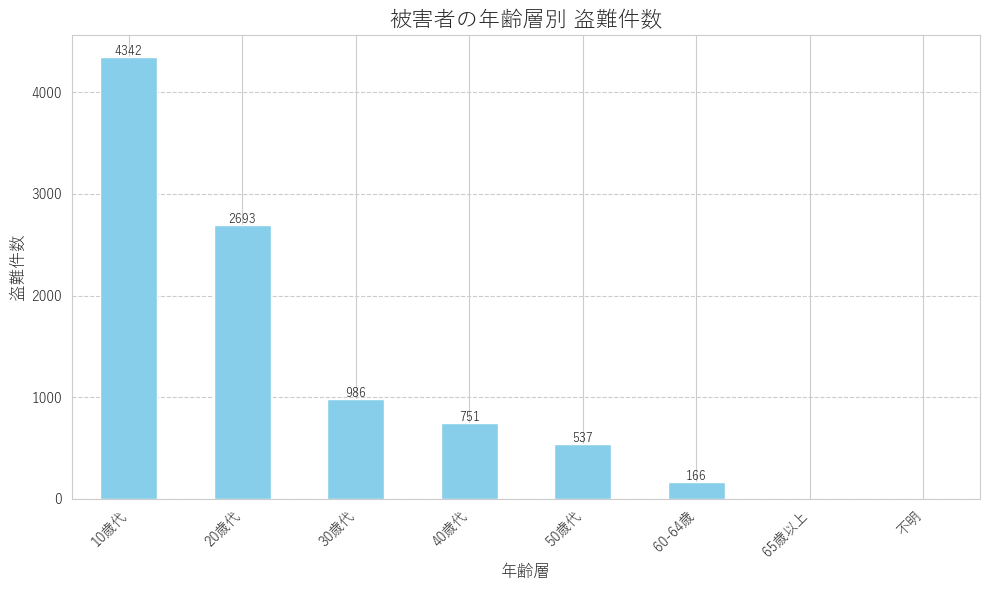

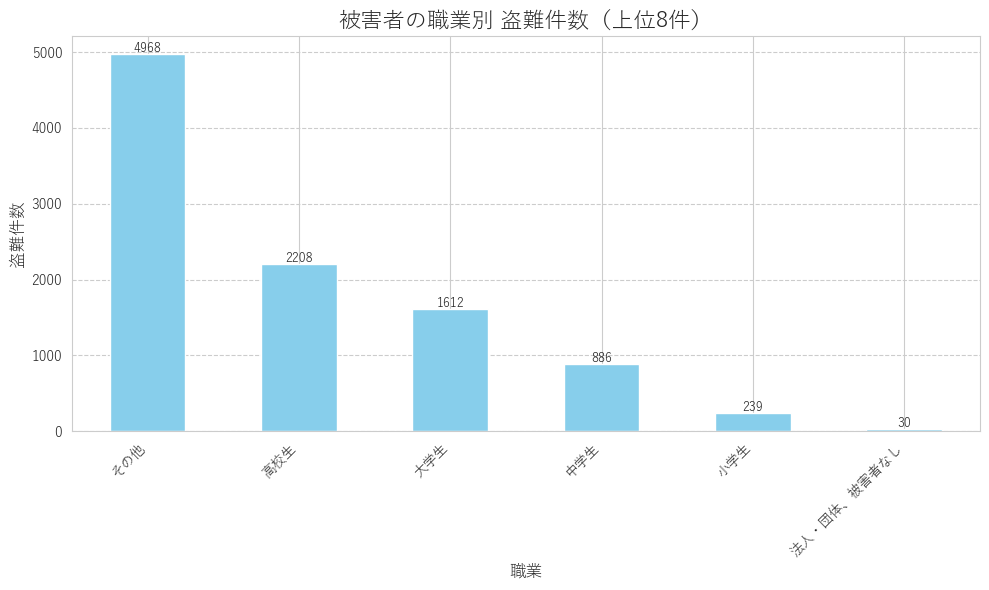

----------------------------------------
### 3. 地域別（市区町村）の盗難件数
上位5地域:
 市区町村（発生地）
船橋市       1263
市川市        872
柏市         691
松戸市        678
千葉市中央区     656
Name: count, dtype: int64


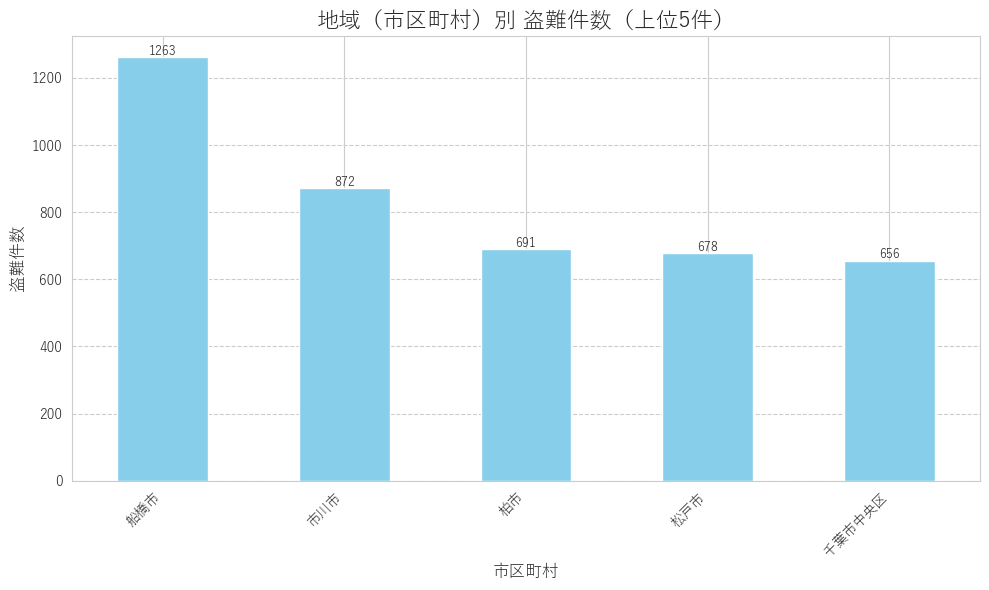

----------------------------------------
### 4. 月別の盗難件数


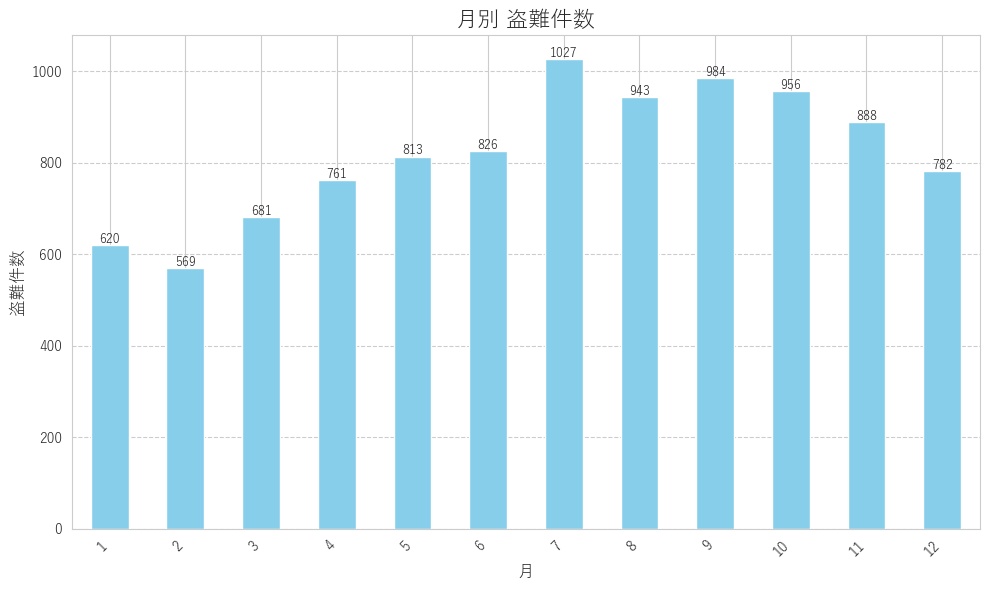

**最も多い月:** 7月 (1027件)
----------------------------------------
### 5. 時間帯別の盗難件数


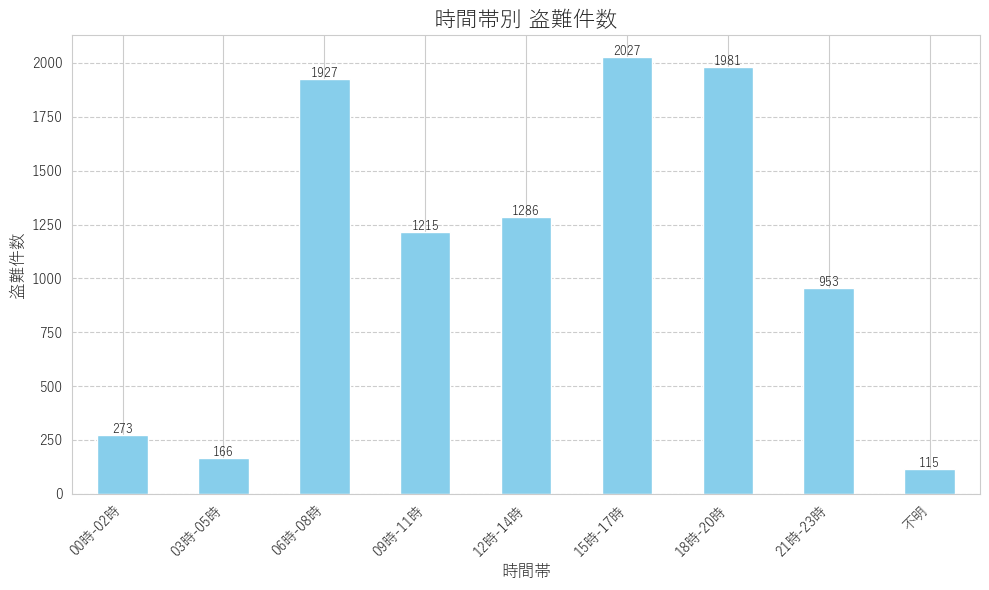

**最も多い時間帯:** 15時-17時 (2027件)
----------------------------------------
### 6. 施錠関係別の盗難件数


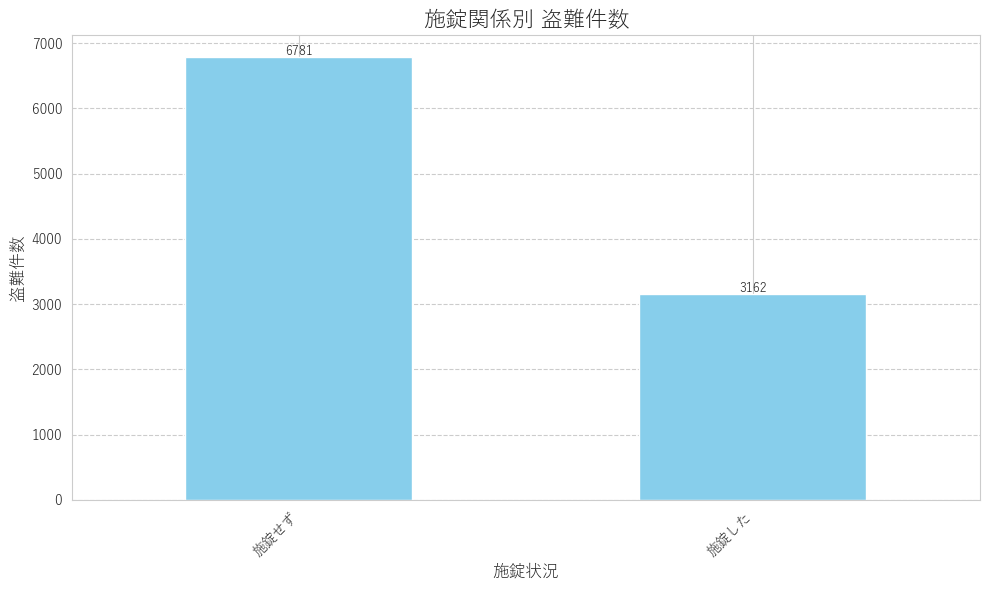

施錠関係別件数:
 施錠関係
施錠せず    6781
施錠した    3162
Name: count, dtype: int64
**施錠せず**の件数: 6781 件
----------------------------------------
### 7. 発生場所別の盗難件数


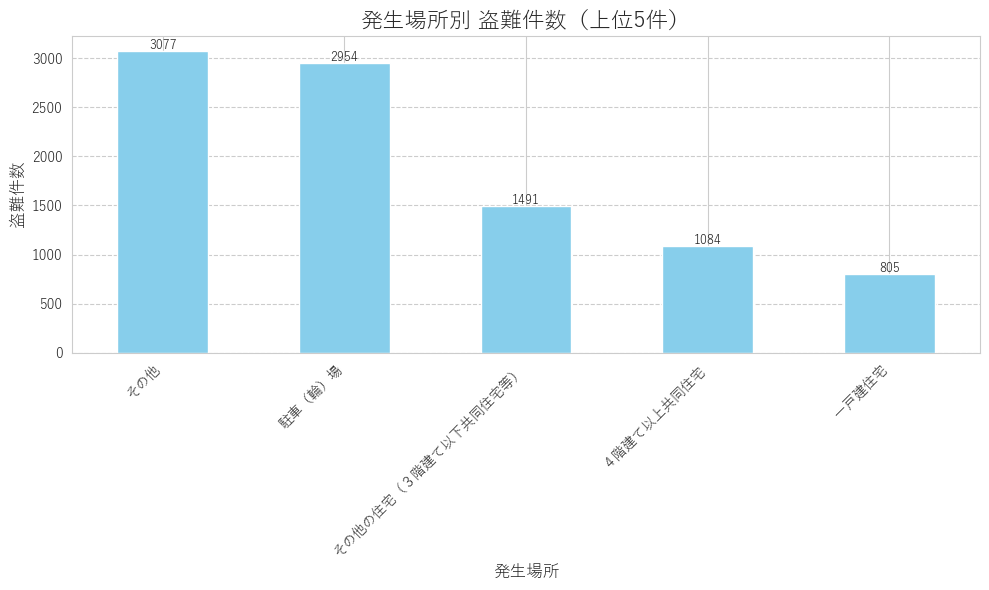

上位5件:
 発生場所
その他                    3077
駐車（輪）場                 2954
その他の住宅（３階建て以下共同住宅等）    1491
４階建て以上共同住宅             1084
一戸建住宅                   805
Name: count, dtype: int64


In [12]:
# ==============================================================================
# 1. ライブラリのインポートと設定
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt

# 日本語表示のためのフォント設定（Windows環境を想定）
try:
    # 'Yu Gothic'がない場合は、'Meiryo'などに変更してください。
    plt.rcParams['font.family'] = 'Yu Gothic'
except:
    print("⚠️ Yu Gothicが見つかりませんでした。代替フォント（例: Meiryo）を試してください。")
    # 例: plt.rcParams['font.family'] = 'Meiryo'

# ==============================================================================
# 2. データの読み込み
# ==============================================================================
file_path = 'jitensha.csv'
# エンコーディングを 'cp932'（Shift-JIS）または 'utf-8' で試す
try:
    df = pd.read_csv(file_path, encoding='cp932')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='utf-8')

print(f"✅ データ読み込み完了。総件数: {len(df)} 件")
print("-" * 40)


# ==============================================================================
# 3. データの整形・前処理（すべてエラー修正済）
# ==============================================================================

# 3-1. 発生年月日（始期）の処理: '不明'をNaNに変換
df['発生年月日（始期）'] = pd.to_datetime(
    df['発生年月日（始期）'], 
    format='%Y%m%d', 
    errors='coerce' # 不正な値を NaT (欠損値) に変換
)
# 発生月から月カラムを作成
df['発生月'] = df['発生年月日（始期）'].dt.month


# 3-2. 発生時（始期）の処理: '不明'をNaNに変換し、時間帯に分類
def categorize_time(hour):
    if pd.isna(hour) or hour == -1: return '不明'
    if 0 <= hour <= 2: return '00時-02時'
    elif 3 <= hour <= 5: return '03時-05時'
    elif 6 <= hour <= 8: return '06時-08時'
    elif 9 <= hour <= 11: return '09時-11時'
    elif 12 <= hour <= 14: return '12時-14時'
    elif 15 <= hour <= 17: return '15時-17時'
    elif 18 <= hour <= 20: return '18時-20時'
    elif 21 <= hour <= 23: return '21時-23時'
    else: return '不明' # <-- SyntaxError修正済

# '発生時（始期）'を数値型に変換: '不明'などの文字列をNaNに変換
df['発生時（始期）'] = pd.to_numeric(df['発生時（始期）'], errors='coerce') # <-- ValueError修正済

# NaNになった値（元々NaNや'不明'だったもの）を-1で埋め、整数型に変換
df['発生時（始期）'] = df['発生時（始期）'].fillna(-1).astype(int)

# 時間帯を分類
df['時間帯'] = df['発生時（始期）'].apply(categorize_time)


# 3-3. その他欠損値の置換
df['被害者の年齢'] = df['被害者の年齢'].fillna('不明')
df['被害者の職業'] = df['被害者の職業'].fillna('不明')
df['施錠関係'] = df['施錠関係'].fillna('不明')

print("✅ データ整形完了。分析準備OK。")
print("-" * 40)


# ==============================================================================
# 4. 分析と視覚化（関数定義）
# ==============================================================================

def plot_bar(data, title, xlabel, ylabel, top_n=None):
    """棒グラフを生成する汎用関数"""
    if top_n:
        data = data.sort_values(ascending=False).head(top_n)
        
    plt.figure(figsize=(10, 6))
    
    data.plot(kind='bar', color='skyblue')
    
    # グラフ上に件数を表示
    for i, v in enumerate(data):
        # 0件のラベルは非表示にする
        if v > 0:
            plt.text(i, v + 0.5, str(int(v)), ha='center', va='bottom', fontsize=9)
    
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()

# ==============================================================================
# 5. 各項目の分析と結果出力
# ==============================================================================

print("## 📊 自転車盗難分析レポート (2024年)")
print("-" * 40)

# --- (1) 総盗難件数 ---
print(f"### 1. 総盗難件数: {len(df)} 件")
print("-" * 40)


# --- (2) 被害者の特徴（年齢・職業） ---
print("### 2. 被害者の特徴")

# 年齢分析
age_counts = df['被害者の年齢'].value_counts()
age_order = ['10歳代', '20歳代', '30歳代', '40歳代', '50歳代', '60-64歳', '65歳以上', '不明']
age_counts = age_counts.reindex(age_order, fill_value=0)
plot_bar(age_counts, '被害者の年齢層別 盗難件数', '年齢層', '盗難件数')

# 職業分析
job_counts = df['被害者の職業'].value_counts()
plot_bar(job_counts, '被害者の職業別 盗難件数（上位8件）', '職業', '盗難件数', top_n=8)
print("-" * 40)


# --- (3) 地域別の盗難件数 ---
print("### 3. 地域別（市区町村）の盗難件数")
area_counts = df['市区町村（発生地）'].value_counts()
print("上位5地域:\n", area_counts.head(5))
plot_bar(area_counts, '地域（市区町村）別 盗難件数（上位5件）', '市区町村', '盗難件数', top_n=5)
print("-" * 40)


# --- (4) 月別の盗難件数 ---
print("### 4. 月別の盗難件数")
# NaT (NaN)のデータは除外し、残りの月をソート
month_counts = df['発生月'].dropna().astype(int).value_counts().sort_index()
plot_bar(month_counts, '月別 盗難件数', '月', '盗難件数')
if not month_counts.empty:
    print(f"**最も多い月:** {month_counts.idxmax()}月 ({month_counts.max()}件)")
print("-" * 40)


# --- (5) 時間帯別の盗難件数 ---
print("### 5. 時間帯別の盗難件数")
time_order = ['00時-02時', '03時-05時', '06時-08時', '09時-11時', '12時-14時', '15時-17時', '18時-20時', '21時-23時', '不明']
time_counts = df['時間帯'].value_counts().reindex(time_order, fill_value=0)
plot_bar(time_counts, '時間帯別 盗難件数', '時間帯', '盗難件数')
if not time_counts.empty:
    # 不明を除いた最大値を検索
    max_time_period = time_counts.drop('不明', errors='ignore').idxmax()
    # <-- IncompleteInputError修正済
    print(f"**最も多い時間帯:** {max_time_period} ({time_counts[max_time_period]}件)") 
print("-" * 40)


# --- (6) 鍵の有無による盗難件数の比較 ---
print("### 6. 施錠関係別の盗難件数")
lock_counts = df['施錠関係'].value_counts()
plot_bar(lock_counts, '施錠関係別 盗難件数', '施錠状況', '盗難件数', top_n=3)
print("施錠関係別件数:\n", lock_counts)
print(f"**施錠せず**の件数: {lock_counts.get('施錠せず', 0)} 件")
print("-" * 40)


# --- (7) 発展分析: 発生場所別の盗難件数 ---
print("### 7. 発生場所別の盗難件数")
place_counts = df['発生場所'].value_counts()
plot_bar(place_counts, '発生場所別 盗難件数（上位5件）', '発生場所', '盗難件数', top_n=5)
print("上位5件:\n", place_counts.head(5))
# ==============================================================================
# 分析コード終了
# ==============================================================================

【分析】
被害者の年齢層は「10代（4,342件）」が圧倒的に多く、次いで「20代（2,693件）」となっている。これに呼应するように、職業別では「高校生（2,208件）」と「大学生（1,612件）」が多く、学生層が被害の中心であることが明確である。

要因: 通学手段として自転車を利用する頻度が高いこと、および若年層の防犯意識（施錠徹底など）の甘さが要因として考えられる。

時間帯: 発生件数のピークは「15時〜17時（2,027件）」および「18時〜20時（1,981件）」の夕方から夜にかけての時間帯であり、次いで「6時〜8時（1,927件）」の朝の時間帯が多い。

月別: 年間を通じて発生しているが、特に7月（1,027件）と10月（956件）に山が見られる。

考察: 時間帯のピークが通勤・通学の「行き（朝）」と「帰り（夕方・夜）」の時間と合致していることから、駅や学校周辺、あるいは自宅等の駐輪場において、長時間駐輪している間に被害に遭っている可能性が高い。

施錠状況（重要）: 盗難被害の約68%（6,781件）が「施錠せず（無施錠）」の状態で発生している。施錠していた場合の被害（3,162件）と比較して2倍以上の差があり、無施錠が盗難リスクを劇的に高める最大の要因となっている。



【まとめ】
データの分析から、自転車盗難の典型的なパターンは、「都市部の若年層（特に学生）が、通学・通勤時間帯に、無施錠のまま駐輪した際に被害に遭っている」というものである。
よって、今後の対策としては以下の点が重要であると考えられる。

ハード面の対策: ツーロック（二重ロック）の推奨や、駐輪場の監視強化。

ソフト面の対策: 特に被害の多い10代・20代（高校・大学）に向けた、短時間の駐輪でも必ず施錠することの啓発活動（キャンペーン等）の強化。